# Graduate Rotational Internship Program

# The Sparks Foundation

# Task - 7: Stock Market Prediction using Numerical and Textual Analysis


# Author : Yashmita

**Problem statement** 

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

**Dataset**

Historical stock prices from finance.yahoo.com & textual (news) data from https:/bit.ly/36fFPI6

# Step 1 : Import the required libraries

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 

In [2]:
!pip3 install statsmodels

In [3]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import norm
import statsmodels.api as sm

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
!pip3 install lightgbm
import lightgbm
     

# Step 2 : Importing the Numerical dataset & perform Exploratory Analysis

In [18]:
df_prices = pd.read_csv('^BSESN.csv')
df_prices.head()

,Date,Open,High,Low,Close
0,01-Jan-15,27485.77,27545.61,27395.34,27507.54
1,02-Jan-15,27521.28,27937.47,27519.26,27887.90
2,05-Jan-15,27978.43,28064.49,27786.85,27842.32
3,06-Jan-15,27694.23,27698.93,26937.06,26987.46
4,07-Jan-15,26983.43,27051.60,26776.12,26908.82


In [19]:
len(df_prices)

1401

In [20]:

df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1401 non-null   datetime64[ns]
 1   Open    1401 non-null   float64       
 2   High    1401 non-null   float64       
 3   Low     1401 non-null   float64       
 4   Close   1401 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 54.9 KB


# Step 3 : Visualizing the data using plot

In [21]:
df_prices.dropna(inplace = True)
print(len(df_prices))

1401


Text(0, 0.5, 'BSESN')

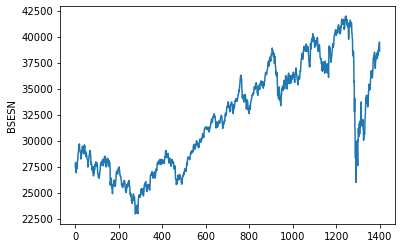

In [22]:
df_prices['Close'].plot()
plt.ylabel('BSESN')

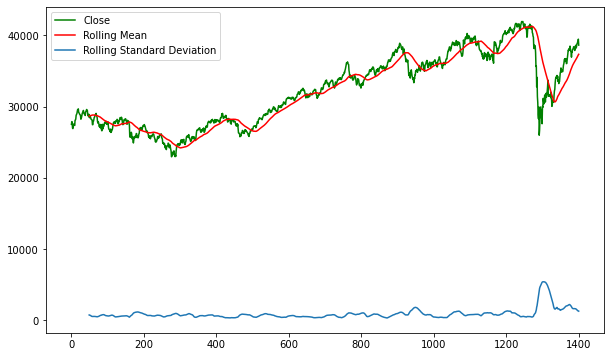

In [23]:
#Plotting moving average
close = df_prices['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df_prices['Close'].plot(color = 'g', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()
     

**INFERENCE**

This time series plot displays the 'Close' prices of a financial asset, along with its rolling mean and rolling standard deviation, making it easier to visualize trends and volatility in the data over time.

# Step 4 : Testing the Model 

In [24]:
# Train test Split

train = df_prices[:3000]
test = df_prices[3000:]

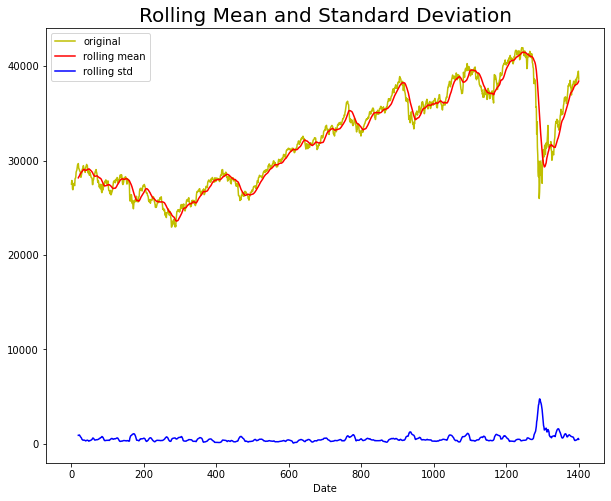

Results of dickey fuller test
ADF Test Statistic : -1.4228198417382858
p-value : 0.5712884335651451
#Lags Used : 11
Number of Observations Used : 1389
Weak evidence against null hypothesis, time series is non-stationary 


In [25]:
#Stationarity test
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

**IMNFERENCE**

This defines a function to test the stationarity of a time series, plots the original series along with its rolling mean and standard deviation, and uses the Dickey-Fuller test to determine whether the time series is stationary or non-stationary.
Based on these results, we can interpret the outcome of the Dickey-Fuller test as follows:

The null hypothesis (H0) in the Dickey-Fuller test is that the time series is non-stationary, meaning it has a unit root and is influenced by past values. The alternative hypothesis (H1) is that the time series is stationary.

The ADF Test Statistic is -1.42, which is less negative than critical values at common significance levels. This suggests that the test statistic is not extreme, and the time series does not convincingly reject the null hypothesis.

The p-value is 0.571, which is substantially greater than the typical significance level of 0.05. When the p-value is high, it indicates weak evidence against the null hypothesis.

Given the ADF Test Statistic and the p-value, we have insufficient evidence to reject the null hypothesis. Therefore, the conclusion is:

"Weak evidence against the null hypothesis, time series is non-stationary."

In other words, the data does not appear to be stationary based on this test, and it likely exhibits some form of non-stationary behavior, such as a trend or seasonality.

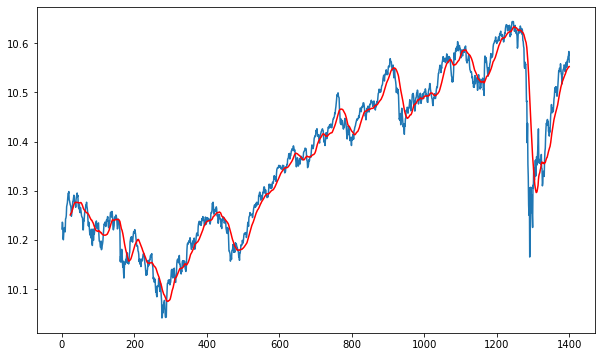

In [26]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red')
     

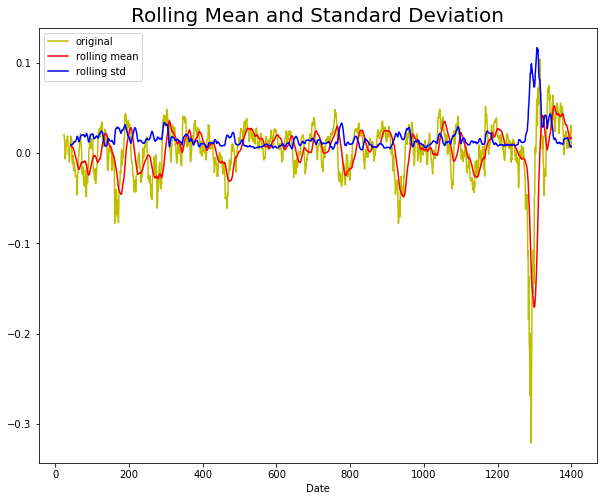

Results of dickey fuller test
ADF Test Statistic : -7.832173101847731
p-value : 6.250714552918045e-12
#Lags Used : 12
Number of Observations Used : 1365
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [28]:

train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

**INFERENCE**

Based on these results, we can interpret the outcome of the Dickey-Fuller test as follows:

The null hypothesis (H0) in the Dickey-Fuller test is that the time series is non-stationary, meaning it has a unit root and is influenced by past values. The alternative hypothesis (H1) is that the time series is stationary.

The ADF Test Statistic is -7.83, which is significantly more negative than critical values at common significance levels. This suggests that the test statistic is highly extreme in the negative direction, providing strong evidence against the null hypothesis.

The p-value is extremely close to zero (approximately 0 when rounded), which is far below the typical significance level of 0.05. When the p-value is very low, it indicates strong evidence against the null hypothesis.

Given the ADF Test Statistic and the very low p-value, we have strong evidence to reject the null hypothesis. Therefore, the conclusion is:

"Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary."

In other words, the data appears to be stationary based on this test, and there is a high degree of confidence that it does not exhibit a unit root or non-stationary behavior.

# Step 5 :Time series Prediction

In [38]:
# Assuming you have already imported the necessary libraries and have defined your 'train_log' and 'test' data

# Fit the ARIMA model
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)

# Define the number of periods for prediction
n_periods = len(test)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8524.583, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8532.085, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8533.900, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8533.704, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8533.460, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8532.613, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8532.148, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8530.679, Time=0.89 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8535.206, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-8533.949, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8533.462, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8535.009, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-8532.016, Time=0.40 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.146 seconds


**INFERENCE**

The best model identified is ARIMA(1,1,0)(0,0,0)[0], with an AIC of -8535.206. This model appears to provide the best trade-off between model complexity and fit to the data among those tested, as it has the lowest AIC. The total time taken for this search process was 4.146 seconds.

# Step 6 : Visualizing stock price prediction

Text(0, 0.5, 'Actual Stock Price')

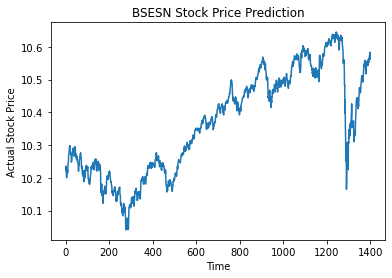

In [40]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')

plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

# Step 7 : Textual Analysis and processing

In [44]:
cols = ['Date','Category','News']
df_news=pd.read_csv('india-news-headlines.csv',names = cols,engine='python', error_bad_lines=False)
df_news
     

C:\Users\hp\AppData\Local\Temp\ipykernel_13424\1618298659.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_news=pd.read_csv('india-news-headlines.csv',names = cols,engine='python', error_bad_lines=False)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [45]:

df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 55.7+ MB


In [46]:
pd.to_datetime(df_news.iloc[:,0].str.replace('‑','-'),format='%Y%m%d')
     

1         2001-01-02
2         2001-01-02
3         2001-01-02
4         2001-01-02
5         2001-01-02
             ...    
3650966   2022-03-31
3650967   2022-03-31
3650968   2022-03-31
3650969   2022-03-31
3650970   2022-03-31
Name: Date, Length: 3650970, dtype: datetime64[ns]

In [47]:
#Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],errors='coerce', format= '%Y%M%d')
df_news
     

,Date,News
1,2001-01-02 00:01:00,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:01:00,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:01:00,America's unwanted heading for India?
4,2001-01-02 00:01:00,For bigwigs; it is destination Goa
5,2001-01-02 00:01:00,Extra buses to clear tourist traffic
...,...,...
3650966,2022-01-31 00:03:00,J&K sacks 2 cops; 3 other employees over terro...
3650967,2022-01-31 00:03:00,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,2022-01-31 00:03:00,As Covid-19 cases drop to nil in southern dist...
3650969,2022-01-31 00:03:00,Tamil Nadu sees marginal rise of Covid cases w...


In [48]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-02 00:01:00,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03 00:01:00,Powerless north India gropes in the dark Think...
2,2001-01-04 00:01:00,The string that pulled Stephen Hawking to Indi...
3,2001-01-05 00:01:00,Light combat craft takes India into club class...
4,2001-01-06 00:01:00,Light combat craft takes India into club class...
...,...,...
7712,2022-01-27 00:03:00,Playing a dead man in Body God meant sitting i...
7713,2022-01-28 00:03:00,As fashion becomes democratic; demand for styl...
7714,2022-01-29 00:03:00,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-01-30 00:03:00,I will not give in to trends: Dossmode The tim...


# Step 8 : Creating model for merging Numerical and textual Analysis

In [49]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [50]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

C:\Users\hp\AppData\Local\Temp\ipykernel_13424\1226800301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
C:\Users\hp\AppData\Local\Temp\ipykernel_13424\1226800301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Polarity'] = df_news['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2001-01-02 00:01:00,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03 00:01:00,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04 00:01:00,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05 00:01:00,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06 00:01:00,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-01-27 00:03:00,Playing a dead man in Body God meant sitting i...,0.369592,0.025109
7713,2022-01-28 00:03:00,As fashion becomes democratic; demand for styl...,0.389939,0.055878
7714,2022-01-29 00:03:00,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198
7715,2022-01-30 00:03:00,I will not give in to trends: Dossmode The tim...,0.350965,0.037729


# Step 9 : Performing Sentiment Analysis on news Headlines

In [51]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

C:\Users\hp\AppData\Local\Temp\ipykernel_13424\2554867971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
C:\Users\hp\AppData\Local\Temp\ipykernel_13424\2554867971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
C:\Users\hp\AppData\Local\Temp\ipykernel_13424\2554867971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:01:00,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03 00:01:00,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04 00:01:00,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05 00:01:00,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06 00:01:00,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7712,2022-01-27 00:03:00,Playing a dead man in Body God meant sitting i...,0.369592,0.025109,-0.9999,0.154,0.764,0.082
7713,2022-01-28 00:03:00,As fashion becomes democratic; demand for styl...,0.389939,0.055878,-0.9999,0.158,0.742,0.100
7714,2022-01-29 00:03:00,Bobby Deol: Like my dad; I hope to be working ...,0.404240,0.095198,-0.9999,0.152,0.766,0.082
7715,2022-01-30 00:03:00,I will not give in to trends: Dossmode The tim...,0.350965,0.037729,-0.9999,0.151,0.775,0.074


In [52]:
df_merge = pd.merge(df_prices, df_news, how='inner', on='Date')
df_merge
     

,Date,Open,High,Low,Close,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive


# Step 10 : Training and determining accuracy of model

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [18]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error = 3044.546457 RMSE


**INFERENCE**

Root Mean Square Error (RMSE) is a measure of the average error between the predicted values and the actual values. It quantifies how far, on average, the predicted values are from the true values.
The lower the RMSE, the better the model's predictive accuracy. A smaller RMSE indicates that, on average, the model's predictions are closer to the actual values.

So, the interpretation of the result is:

"The Root Mean Square Error (RMSE) between the predicted values and the actual values is approximately 3044.546457."
This means that, on average, the predictions made by the model have an error of approximately 3044.546457 units when compared to the true values. Lower RMSE values would suggest better predictive accuracy, while higher values indicate that the model's predictions are less accurate.

**END NOTE**

The hybrid predictive model that combines numerical analysis of past stock prices with sentiment analysis of news headlines to forecast stock price movements. This achievement involves merging historical stock price data with sentiment data extracted from news headlines. The resulting hybrid model aims to enhance the accuracy and reliability of stock performance predictions by leveraging both quantitative and qualitative information. This innovative approach represents a synthesis of numerical and sentiment-based analyses, offering a comprehensive and more robust means of anticipating stock market dynamics and price trends.